# Keras Classification

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
from sklearn.metrics import confusion_matrix

In [154]:
df=sns.load_dataset('titanic')

In [20]:
df.iloc[[1,3,6,10],:]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False


In [21]:
df['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [23]:
df[['pclass', 'survived']].groupby(['pclass'], as_index=False).mean()

,pclass,survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [24]:
df[["sex", "survived"]].groupby(['sex'], as_index=False).mean()

,sex,survived
0,female,0.742038
1,male,0.188908


In [148]:
df[["age", "survived"]].groupby(['survived'], as_index=False).mean()

,survived,age
0,0,30.626179
1,1,28.343690


<AxesSubplot:xlabel='survived', ylabel='age'>

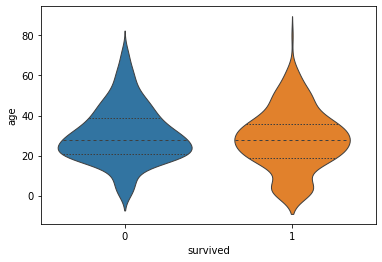

In [177]:
sns.violinplot(data=df, x="survived", y="age",
               split=True, inner="quart", linewidth=1)

<AxesSubplot:xlabel='survived', ylabel='age'>

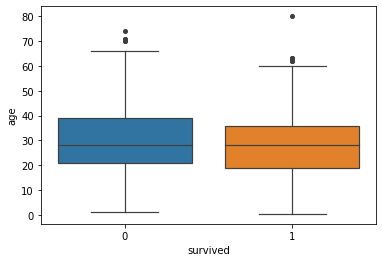

In [179]:
sns.boxplot(data=df, 
                 linewidth=1.2, 
                 fliersize=2,x='survived',y='age',flierprops=dict(marker='o', markersize=4))

(array([0.0084001 , 0.00323081, 0.00710778, 0.00323081, 0.03295425,
        0.03101577, 0.03618506, 0.03489274, 0.01938485, 0.0219695 ,
        0.01809253, 0.01098475, 0.01486172, 0.00969243, 0.00452313,
        0.00516929, 0.00452313, 0.00387697, 0.00129232, 0.00258465]),
 array([ 1.  ,  4.65,  8.3 , 11.95, 15.6 , 19.25, 22.9 , 26.55, 30.2 ,
        33.85, 37.5 , 41.15, 44.8 , 48.45, 52.1 , 55.75, 59.4 , 63.05,
        66.7 , 70.35, 74.  ]),
 <BarContainer object of 20 artists>)

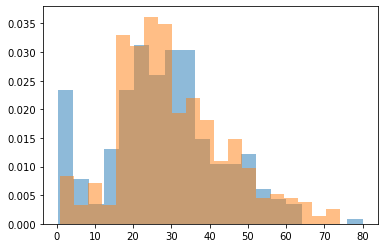

In [175]:
plt.hist(df[df['survived']==1]['age'], 20, density=True, histtype='bar', stacked=True,alpha=0.5)
plt.hist(df[df['survived']==0]['age'], 20, density=True, histtype='bar', stacked=True,alpha=0.5)

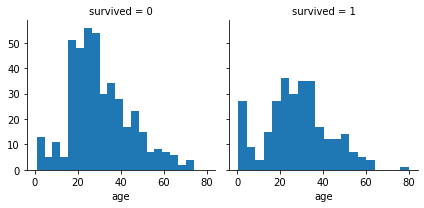

In [168]:
g=sns.FacetGrid(df, col='survived')
g.map(plt.hist, 'age', bins=20)

In [105]:
df_1=df.dropna().copy()

In [106]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 1 to 889
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     182 non-null    int64   
 1   pclass       182 non-null    int64   
 2   sex          182 non-null    object  
 3   age          182 non-null    float64 
 4   sibsp        182 non-null    int64   
 5   parch        182 non-null    int64   
 6   fare         182 non-null    float64 
 7   embarked     182 non-null    object  
 8   class        182 non-null    category
 9   who          182 non-null    object  
 10  adult_male   182 non-null    bool    
 11  deck         182 non-null    category
 12  embark_town  182 non-null    object  
 13  alive        182 non-null    object  
 14  alone        182 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 18.2+ KB


In [107]:
df_1=df_1.drop(columns=['who','adult_male','alive'])

In [109]:
enc = OrdinalEncoder()
df_1[['sex','embarked','class','deck','alone','embark_town']] = enc.fit_transform(df_1[['sex','embarked','class','deck','alone','embark_town']])

In [110]:
df_1

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
1,1,1,0.0,38.0,1,0,71.2833,0.0,0.0,2.0,0.0,0.0
3,1,1,0.0,35.0,1,0,53.1000,2.0,0.0,2.0,2.0,0.0
6,0,1,1.0,54.0,0,0,51.8625,2.0,0.0,4.0,2.0,1.0
10,1,3,0.0,4.0,1,1,16.7000,2.0,2.0,6.0,2.0,0.0
11,1,1,0.0,58.0,0,0,26.5500,2.0,0.0,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,0.0,47.0,1,1,52.5542,2.0,0.0,3.0,2.0,0.0
872,0,1,1.0,33.0,0,0,5.0000,2.0,0.0,1.0,2.0,1.0
879,1,1,0.0,56.0,0,1,83.1583,0.0,0.0,2.0,0.0,0.0
887,1,1,0.0,19.0,0,0,30.0000,2.0,0.0,1.0,2.0,1.0


In [111]:
X_train, X_test, y_train, y_test = train_test_split(df_1.values[:,1:], df_1.values[:,0], test_size=0.2, random_state=42)

In [135]:
model = Sequential()
model.add(Dense(11, input_dim=11, activation='relu'))
model.add(Dense(8, activation='relu'))#Hidden
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, batch_size=10)

Epoch 1/100
15/15 [==============================] - 1s 2ms/step - loss: 3.6437 - accuracy: 0.6897
Epoch 2/100
15/15 [==============================] - 0s 3ms/step - loss: 2.0197 - accuracy: 0.7065
Epoch 3/100
15/15 [==============================] - 0s 3ms/step - loss: 0.8481 - accuracy: 0.7501
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 1.0194 - accuracy: 0.5431
Epoch 5/100
15/15 [==============================] - 0s 7ms/step - loss: 0.7721 - accuracy: 0.6279
Epoch 6/100
15/15 [==============================] - 0s 3ms/step - loss: 0.7156 - accuracy: 0.6404
Epoch 7/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6587 - accuracy: 0.6403
Epoch 8/100
15/15 [==============================] - 0s 5ms/step - loss: 0.6333 - accuracy: 0.6824
Epoch 9/100
15/15 [==============================] - 0s 3ms/step - loss: 0.5874 - accuracy: 0.7205
Epoch 10/100
15/15 [==============================] - 0s 6ms/step - loss: 0.6098 - accuracy: 0.6780
Epoch 11/

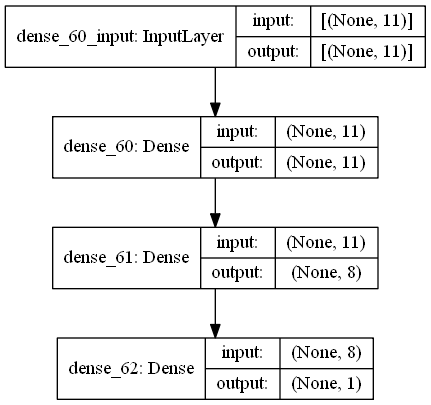

In [136]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [137]:
score = model.evaluate(X_train,y_train)

5/5 [==============================] - 0s 1ms/step - loss: 0.5098 - accuracy: 0.7517


In [138]:
predictions = model.predict(X_test)

In [139]:
predictions

array([[0.8716227 ],
       [0.8279038 ],
       [0.8995893 ],
       [0.81948197],
       [0.5197122 ],
       [0.36648822],
       [0.786063  ],
       [0.9474331 ],
       [0.51505846],
       [0.45869806],
       [0.8616648 ],
       [0.79714197],
       [0.79565156],
       [0.647104  ],
       [0.64986724],
       [0.69679904],
       [0.80053246],
       [0.8649423 ],
       [0.6354798 ],
       [0.83047223],
       [0.70794255],
       [0.6010939 ],
       [0.592044  ],
       [0.82742417],
       [0.5104125 ],
       [0.9219471 ],
       [0.8393884 ],
       [0.5447297 ],
       [0.7578843 ],
       [0.5077217 ],
       [0.8367097 ],
       [0.6506265 ],
       [0.48549497],
       [0.46510175],
       [0.78524494],
       [0.79318774],
       [0.7468135 ]], dtype=float32)

In [140]:
predictions=predictions.reshape(1,37)

In [142]:
confusion_matrix(y_test == 1,predictions[0] > 0.5)

array([[ 3, 10],
       [ 1, 23]], dtype=int64)

# Perceptron Manuel

In [143]:
def activation(Row, Weights):
    return 1.0 if np.sum(Row.T*Weights)>=0 else 0.0
    
    
def train(Epoch,LearningRate,Sets):
    X_size=int(len(Sets[0]))
    Y_size=int(len(Sets))
    weights=[0 for i in range(X_size-1)]#np.zeros
    i=0
    while i<Epoch:
        error_count=0
        for elements in Sets:
            prediction=activation(elements[:X_size-1],weights)
            
            is_error=elements[-1]-prediction
            error_count+=abs(is_error)
            j=0
            while j<X_size-1:
                weights[j]=weights[j]+LearningRate*is_error*elements[j]
                j+=1
        print("Epoch: {}, accuary: {}".format(i,1-(error_count/Y_size)))
        i+=1
    return weights

weights=train(73,0.01,np.column_stack((X_train,y_train)))

Epoch: 0, accuary: 0.5586206896551724
Epoch: 1, accuary: 0.5793103448275863
Epoch: 2, accuary: 0.503448275862069
Epoch: 3, accuary: 0.5931034482758621
Epoch: 4, accuary: 0.5310344827586206
Epoch: 5, accuary: 0.6068965517241379
Epoch: 6, accuary: 0.5793103448275863
Epoch: 7, accuary: 0.5310344827586206
Epoch: 8, accuary: 0.5724137931034483
Epoch: 9, accuary: 0.503448275862069
Epoch: 10, accuary: 0.5517241379310345
Epoch: 11, accuary: 0.5931034482758621
Epoch: 12, accuary: 0.5310344827586206
Epoch: 13, accuary: 0.5724137931034483
Epoch: 14, accuary: 0.5793103448275863
Epoch: 15, accuary: 0.5310344827586206
Epoch: 16, accuary: 0.5724137931034483
Epoch: 17, accuary: 0.503448275862069
Epoch: 18, accuary: 0.5586206896551724
Epoch: 19, accuary: 0.6
Epoch: 20, accuary: 0.5517241379310345
Epoch: 21, accuary: 0.5931034482758621
Epoch: 22, accuary: 0.5655172413793104
Epoch: 23, accuary: 0.5724137931034483
Epoch: 24, accuary: 0.5862068965517242
Epoch: 25, accuary: 0.5931034482758621
Epoch: 26, acc

In [144]:
pre=[]
for i in X_test:
    pre.append(activation(i,weights))

In [145]:
confusion_matrix(y_test,pre)

array([[ 0, 13],
       [ 0, 24]], dtype=int64)

In [146]:
weights

[1.170000000000001,
 -9.749999999999837,
 1.0200000000000156,
 2.6599999999999784,
 -0.8399999999999995,
 0.43818899999999467,
 -0.3400000000000002,
 -0.9900000000000004,
 0.9799999999999993,
 -0.3400000000000002,
 -0.7900000000000005]